# Loan Data Preparation

## This notebook is for Data Cleaning and Feature Engineering

**==============================================================================================================**

## Data Dictionary

![image](desc.png)

**==============================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

import datetime
from datetime import datetime, timedelta, date, time


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, Binarizer 
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
import feature_engine

from feature_engine.imputation import AddMissingIndicator, CategoricalImputer, DropMissingData, MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer, RandomSampleImputer

from feature_engine.outliers import Winsorizer, ArbitraryOutlierCapper, OutlierTrimmer

from feature_engine.encoding import CountFrequencyEncoder, DecisionTreeEncoder, MeanEncoder, OneHotEncoder
from feature_engine.encoding import OrdinalEncoder, WoEEncoder, RareLabelEncoder, StringSimilarityEncoder

from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, ArbitraryDiscretiser
from feature_engine.discretisation import DecisionTreeDiscretiser, EqualWidthDiscretiser

from feature_engine.datetime import DatetimeFeatures

from feature_engine.creation import CyclicalFeatures, MathFeatures, RelativeFeatures


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Data Quick Glance

In [2]:
df = pd.read_csv("train.csv")

In [ ]:
df = pd.read_csv("trainmod2.csv")

In [ ]:
df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
df.dtypes.value_counts()

object     8
int64      8
float64    2
dtype: int64

In [5]:
# Descriptive Statistical Analysis
df.describe(include="all")

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347,255347,255347,255347,255347,255347,255347,255347.00
unique,255347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,5,2,NaN
top,I38PQUQS96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64366,64161,85302,127677,127742,51298,127701,NaN
mean,NaN,43.50,82499.30,127578.87,574.26,59.54,2.50,13.49,36.03,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12
std,NaN,14.99,38963.01,70840.71,158.90,34.64,1.12,6.64,16.97,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.32
min,NaN,18.00,15000.00,5000.00,300.00,0.00,1.00,2.00,12.00,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,31.00,48825.50,66156.00,437.00,30.00,2.00,7.77,24.00,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,NaN,43.00,82466.00,127556.00,574.00,60.00,2.00,13.46,36.00,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,NaN,56.00,116219.00,188985.00,712.00,90.00,3.00,19.25,48.00,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [6]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00
mean,43.50,82499.30,127578.87,574.26,59.54,2.50,13.49,36.03,0.50,0.12
std,14.99,38963.01,70840.71,158.90,34.64,1.12,6.64,16.97,0.23,0.32
min,18.00,15000.00,5000.00,300.00,0.00,1.00,2.00,12.00,0.10,0.00
25%,31.00,48825.50,66156.00,437.00,30.00,2.00,7.77,24.00,0.30,0.00
50%,43.00,82466.00,127556.00,574.00,60.00,2.00,13.46,36.00,0.50,0.00
75%,56.00,116219.00,188985.00,712.00,90.00,3.00,19.25,48.00,0.70,0.00
max,69.00,149999.00,249999.00,849.00,119.00,4.00,25.00,60.00,0.90,1.00


In [7]:
# Descriptive Statistical Analysis
df.describe(include="object")

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347,255347
unique,255347,4,4,3,2,2,5,2
top,I38PQUQS96,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,1,64366,64161,85302,127677,127742,51298,127701


In [8]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default'], dtype='object')

In [9]:
# Check target variable

df.Default.value_counts()

0    225694
1     29653
Name: Default, dtype: int64

## Overall Visualization

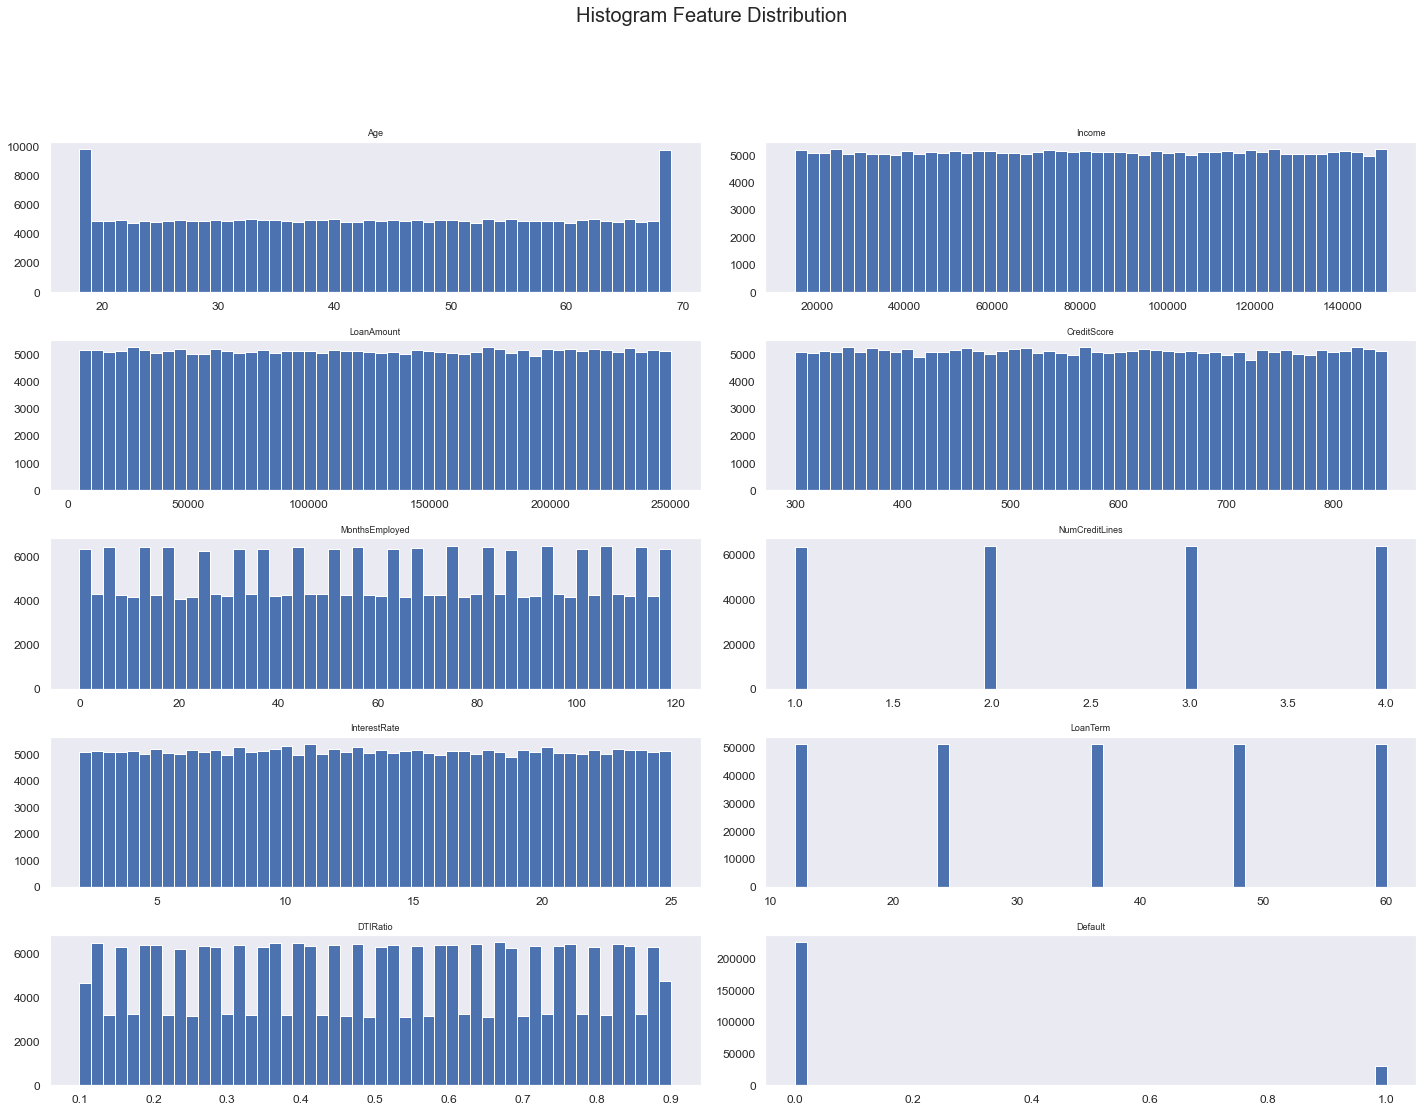

In [10]:
df.hist(bins=50, figsize=(20,50), layout=(len(df.columns),2), grid=False)
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

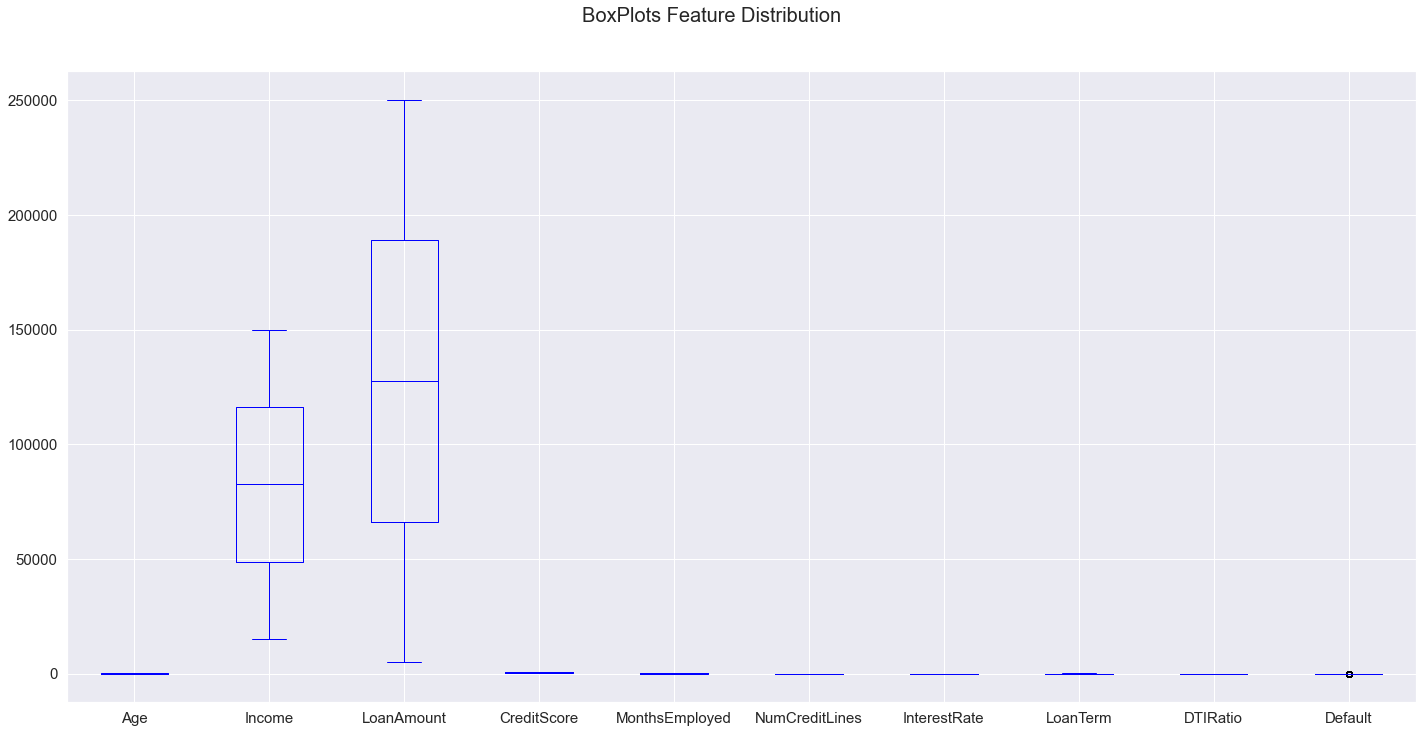

In [11]:
df.boxplot(figsize=(20,10), color='blue', fontsize=15)
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

**==============================================================================================================**

# Data Preprocessing

# Feature Engineering

  * **Feature selection**
    * Removing uninformative features
  * **Feature extraction**
    * Creating new features from existing features
  * **Feature transformation**
    * Modifying existing features to better suit our objectives
    * Encoding of categorical features as dummies
 
When modeling, best practice is to perform a rigorous examination of your data before beginning feature engineering and feature selection. This process is important. Not only does it help you understand your data, what it's telling you, and what it's _not_ telling you, but it also can give you clues that help you create new features. 

### Drop unwanted features (Based on Domain Knowledge)

In [12]:
df.head(1)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


In [13]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default'], dtype='object')

In [14]:
df.drop(['LoanID'], axis=1, inplace=True)

In [15]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [16]:
df.tail()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [ ]:
#df.to_csv("trainmod.csv", index=False)

### Reducing features after performing selection

In [ ]:
df.head()

In [ ]:
df2 = df[['age', 'income', 'loanamount', 'monthsemployed', 'interestrate', 'default']]

In [ ]:
df2

In [ ]:
#df2.to_csv("trainmod.csv", index=False)

## Rename columns

In [ ]:
df.columns

In [ ]:
#Method 3: Using a new list of column names

# Creating a list of new columns
df_cols = ['age', 'income', 'loanamount', 'creditscore', 'monthsemployed', 'numcreditlines', 
           'interestrate', 'loanterm', 'dtiratio', 'default', 
           'degree', 'masters', 'highschool', 'fulltime', 'unemployed', 'selfemployed', 'divorced', 
           'married', 'hasmortgage', 'hasdependents', 'otherloans', 'autoloans', 'businessloans', 
           'homeloans', 'hascosigner'
          ]

# printing the columns
# before renaming
print(df.columns)

# Renaming the columns
df.columns = df_cols

# printing the columns
# after renaming
print(df.columns)


In [ ]:
# make all column headers in pandas data frame lower case

df.columns = map(str.lower, df.columns)

In [ ]:
df.columns

In [ ]:
# remove special character
df.columns = df.columns.str.replace(' ', '')

In [ ]:
# remove special character
df.columns = df.columns.str.replace('_', '')

In [ ]:
# remove special character
df.columns = df.columns.str.replace('-', '')

In [ ]:
# remove special character
df.columns = df.columns.str.replace('.', '')

In [ ]:
df.head()

In [ ]:
#df.to_csv("trainmod.csv", index=False)

## Rearrange columns

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
cols = ['age', 'income', 'loanamount', 'creditscore', 'monthsemployed', 
        'numcreditlines', 'interestrate', 'loanterm', 'dtiratio',
        'degree', 'masters', 'highschool', 'fulltime', 'unemployed',
        'selfemployed', 'divorced', 'married', 'hasmortgage', 'hasdependents',
        'otherloans', 'autoloans', 'businessloans', 'homeloans', 'hascosigner', 'default'
        ]

In [ ]:
df = df[cols]

In [ ]:
df.head()

In [ ]:
#df.to_csv("trainmode", index=False)

**==============================================================================================================**

## Data Types

<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.head(1)

**==============================================================================================================**

## Treat Missing Values

<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

For easier detection of missing values, pandas provides the `isna()`, `isnull()`, and `notna()` functions. For more information on pandas missing values please check out this documentation).

There are several options for dealing with missing values. We will use 'Lot Frontage' feature to analyze for missing values.

1. We can drop the missing values, using `dropna()` method.

2. We can drop the whole attribute (column), that contains missing values, using the `drop()` method.

3. We can replace the missing values (zero, the mean, the median, etc.), using `fillna()` method.

In [17]:
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

**==============================================================================================================**

## Treat Duplicate Values

In [18]:
df.duplicated(keep='first').sum()

0

**==============================================================================================================**

## One-hot encoding

There are three unique values: France, Spain, and Germany. Let's encode this data so it can be represented using Boolean features. We'll use a pandas function called `pd.get_dummies()` to do this.

When we call `pd.get_dummies()` on this feature, it will replace the `Geography` column with three new Boolean columns--one for each possible category contained in the column being dummied. 

When we specify `drop_first=True` in the function call, it means that instead of replacing `Geography` with three new columns, it will instead replace it with two columns. We can do this because no information is lost from this, but the dataset is shorter and simpler.  

In this case, we end up with two new columns called `Geography_Germany` and `Geography_Spain`. We don't need a `Geography_France` column. Why not? Because if a customer's values in `Geography_Germany` and `Geography_Spain` are both 0, we'll know they're from France! 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [20]:
df.describe(include="object")

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347
unique,4,4,3,2,2,5,2
top,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,64366,64161,85302,127677,127742,51298,127701


In [21]:
list(df.describe(include="object"))

['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [23]:
df["Education"].value_counts().to_frame()

,Education
Bachelor's,64366
High School,63903
Master's,63541
PhD,63537


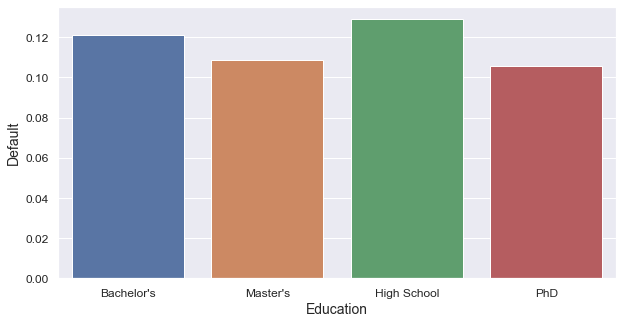

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Education, y=df.Default, data=df, ci=None, estimator=mean)
plt.title("")
plt.show()

In [ ]:
df["employmenttype"].value_counts().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.employmenttype, y=df.default, data=df, ci=None, estimator=mean)
plt.title("")
plt.show()

In [ ]:
df["maritalstatus"].value_counts().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.maritalstatus, y=df.default, data=df, ci=None, estimator=mean)
plt.title("")
plt.show()

In [ ]:
df["hasmortgage"].value_counts().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.hasmortgage, y=df.default, data=df, ci=None, estimator=mean)
plt.title("")
plt.show()

In [ ]:
df["hasdependents"].value_counts().to_frame()

In [ ]:
df["loanpurpose"].value_counts().to_frame()

In [ ]:
df["hascosigner"].value_counts().to_frame()

## One Hot Encoding - Feature-engine

Just like imputation, all methods of categorical encoding should be performed over the training set, and then propagated to the test set. 

Why? 

Because these methods will "learn" patterns from the train data, and therefore you want to avoid leaking information and overfitting. But more importantly, because we don't know whether in future / live data, we will have all the categories present in the train data, or if there will be more or less categories. Therefore, we want to anticipate this uncertainty by setting the right processes right from the start. We want to create transformers that learn the categories from the train set, and used those learned categories to create the dummy variables in both train and test sets.

In [ ]:
df.columns

In [ ]:
df.describe(include="object")

In [ ]:
list(df.describe(include="object"))

In [ ]:
# set up encoder

encoder = OneHotEncoder(
    variables=['education', 'employmenttype', 'maritalstatus', 'hasmortgage', 'hasdependents', 'loanpurpose', 'hascosigner'],  # alternatively pass a list of variables
    drop_last=True,  # to return k-1, use drop=false to return k dummies
)

In [ ]:
# fit the encoder (finds categories)

encoder.fit(df)

In [ ]:
# automatically found numerical variables

encoder.variables_

In [ ]:
# we observe the learned categories

encoder.encoder_dict_

In [ ]:
# transform the data sets

df2 = encoder.transform(df)

In [ ]:
df2.head()

In [ ]:
# we can retrieve the feature names as follows:

encoder.get_feature_names_out()

In [ ]:
df2.head()

In [ ]:
#df2.to_csv("trainmod.csv", index=False)

**==============================================================================================================**

# Feature Scaling

## Data Standardization
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

### What is standardization?

Standardisation involves centering the variable at zero, and standardising the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

**z = (x - x_mean) /  std**

The result of the above transformation is **z**, which is called the z-score, and represents how many standard deviations a given observation deviates from the mean. A z-score specifies the location of the observation within a distribution (in numbers of standard deviations respect to the mean of the distribution). The sign of the z-score (+ or - ) indicates whether the observation is above (+) or below ( - ) the mean.

The shape of a standardised (or z-scored normalised) distribution will be identical to the original distribution of the variable. If the original distribution is normal, then the standardised distribution will be normal. But, if the original distribution is skewed, then the standardised distribution of the variable will also be skewed. In other words, **standardising a variable does not normalize the distribution of the data** and if this is the desired outcome, we should implement any of the techniques discussed in section 7 of the course.

In a nutshell, standardisation:

- centers the mean at 0
- scales the variance at 1
- preserves the shape of the original distribution
- the minimum and maximum values of the different variables may vary
- preserves outliers

Good for algorithms that require features centered at zero.

### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

| Name | Sklearn_class |
|-------------|------------|
|Standard scaler | Standard scaler | 
|MinMaxScaler    | MinMax Scaler   |
|MaxAbs Scaler   | MaxAbs Scaler   |
|Robust scaler   | Robust scaler   |
|Quantile Transformer_Normal | Quantile Transformer(output_distribution ='normal')|
|Quantile Transformer_Uniform| Quantile Transformer(output_distribution = 'uniform')|
|PowerTransformer-Yeo-Johnson| PowerTransformer(method = 'yeo-johnson')|
|Normalizer | Normalizer|

## Scaling to Minimum and Maximum values - MinMaxScaling

Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the value range:

X_scaled = (X - X.min / (X.max - X.min)


The result of the above transformation is a distribution which values vary within the range of 0 to 1. But the mean is not centered at zero and the standard deviation varies across variables. The shape of a min-max scaled distribution will be similar to the original variable. This scaling technique is also sensitive to outliers.

In a nutshell, MinMaxScaling:

- the minimum and maximum values are 0 and 1.
- does not center the mean at 0
- variance varies across variables
- sensitive outliers

**==============================================================================================================**

#### Python code done by Dennis Lam